In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
train = pd.read_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X_train_credit.csv', index_col = 0)

In [3]:
train.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT
2,0,0,67500.0,135000.0,6750.0,135000.0,225,4260.0,2531,0.555912,0.729567,"(50.0, 55.0]",2.000000,0.100000,0.050000,1.000000
5,0,0,99000.0,490495.5,27517.5,454500.0,1588,4970.0,477,0.354225,0.621226,"(45.0, 50.0]",4.954500,0.277955,0.056101,1.079198
6,0,1,171000.0,1560726.0,41301.0,1395000.0,3130,1213.0,619,0.724000,0.492060,"(35.0, 40.0]",9.127053,0.241526,0.026463,1.118800
7,0,0,360000.0,1530000.0,42075.0,1530000.0,449,4597.0,2379,0.714279,0.540654,"(50.0, 55.0]",4.250000,0.116875,0.027500,1.000000
10,0,1,112500.0,652500.0,21177.0,652500.0,679,4427.0,738,0.651862,0.363945,"(25.0, 30.0]",5.800000,0.188240,0.032455,1.000000


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# Getting features dropping target
X = train.drop(['TARGET'], axis = 1)

In [6]:
# Keeping target
y = train['TARGET']

In [7]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.1)

# Preprocessing 

## 1 ) MinMaxScaler

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Giving 0 for min and 1 for max.. for the rest the proportion
scaler = MinMaxScaler()

In [9]:
''' Scaling X_train excepted  'age' '''

for col in X_train.drop('AGE', axis = 1).columns :
    X_train.loc[:, col] = scaler.fit_transform(X_train[col].values.reshape(-1,1))

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set 

In [10]:
''' Scaling X_test excepted  and 'age' '''

for col in X_test.drop('AGE', axis = 1).columns :
    X_test.loc[:, col] = scaler.fit_transform(X_test[col].values.reshape(-1,1))

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set 

## 2 ) Label Encoder

In [11]:
# Encoding 'AGE'
from sklearn.preprocessing import LabelEncoder

# Creating OneHotEncoder
encoder = LabelEncoder()

In [12]:
# Encoding 'AGE' for X_train
X_train['AGE'] = encoder.fit_transform(X_train['AGE'].values.reshape(-1, 1))

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-12-1e289b65ed04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['AGE'] = encoder.fit_transform(X_train['AGE'].values.reshape(-1, 1))


In [13]:
# Encoding 'AGE' for X_test
X_test['AGE'] = encoder.fit_transform(X_test['AGE'].values.reshape(-1, 1))

<ipython-input-13-b8dd57bfac34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['AGE'] = encoder.fit_transform(X_test['AGE'].values.reshape(-1, 1))


In [14]:
X_train.shape

(181547, 15)

In [15]:
y_train.shape

(181547,)

In [16]:
X_train.head(3)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT
222842,0.052632,0.002081,0.146400,0.245435,0.135802,0.058732,0.138782,0.434070,0.670627,0.554188,2,0.070014,0.165267,0.781785,0.158838
69448,0.000000,0.000389,0.102247,0.067980,0.103255,0.179656,0.034020,0.110046,0.865760,0.689009,2,0.189258,0.185363,0.179696,0.145299
143542,0.000000,0.000927,0.122826,0.068086,0.105499,0.074252,0.223744,0.271224,0.706953,0.709809,6,0.119188,0.098926,0.114523,0.172376


In [17]:
X_test.head(6)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT
63929,0.0,0.023929,0.168946,0.133003,0.141667,0.022850,0.510792,0.603315,0.782673,0.893595,7,0.207096,0.192895,0.151444,0.204304
192581,0.0,0.055416,0.198287,0.193165,0.166667,0.140710,0.000700,0.231413,0.846389,0.223295,1,0.118082,0.133869,0.235991,0.204305
105858,0.0,0.030227,0.031520,0.036860,0.023810,0.096332,0.037677,0.112810,0.117061,0.273621,1,0.036540,0.050903,0.335134,0.210431
91905,0.0,0.093199,0.187012,0.147697,0.175000,0.215274,0.423543,0.204377,0.711800,0.674520,5,0.067563,0.061843,0.151303,0.176739
277280,0.0,0.030227,0.301671,0.240901,0.291667,0.066386,0.219926,0.408754,0.784455,0.260352,1,0.302149,0.281617,0.150703,0.169387
135870,0.0,0.023929,0.045158,0.044913,0.047619,0.132111,0.411378,0.787255,0.033903,0.258906,4,0.061048,0.073367,0.264024,0.149171


In [18]:
X_train.shape

(181547, 15)

In [19]:
X_test.shape

(20172, 15)

# MODELS

## 1)  GradientBoostingClassifier

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# Creating estimator
model = GradientBoostingClassifier()

# Fitting model
model.fit(X_train, y_train)

# cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

# Printing mean score
np.mean(scores)

0.7473196426002978

### Tuning hyperparameters

In [21]:
from sklearn.model_selection import GridSearchCV


# Optimal number of estimators
param_test1={'n_estimators': range(20,100,10)}

# GridSearchCV / roc_auc_score
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
                        param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)


# Fitting
gsearch1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'n_estimators': range(20, 100, 10)},
             scoring='roc_auc')

In [22]:
# Best estimator
print('Best estimator : {}'.format(gsearch1.best_estimator_))
# Best score
print('Best score : {}'.format(gsearch1.best_score_))
# Best parameters
print('Best parameters : {}'.format(gsearch1.best_params_))

Best estimator : GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                           min_samples_leaf=50, min_samples_split=500,
                           n_estimators=80, random_state=10, subsample=0.8)
Best score : 0.7465634794054854
Best parameters : {'n_estimators': 80}


Almost 75% give us good results... Trying to improve now..

#########################################################################################################################

Now we use grid search to find optimal min_samples_split hyperparameter

In [23]:
# Giving a range for min_samples_split's hyperparameter
param_test2 = {'min_samples_split':range(1000,2100,200)}

# We keep hyperparameters found above
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(n_estimators=90,learning_rate=0.1,min_samples_leaf=50,max_features='sqrt',subsample=0.8,random_state=10), 
                        param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5)

In [24]:
# Fitting grid
gsearch2.fit(X_train, y_train)

# Best estimator
print('Best estimator : {}'.format(gsearch2.best_estimator_))
# Best score
print('Best score : {}'.format(gsearch2.best_score_))
# Best parameters
print('Best parameters : {}'.format(gsearch2.best_params_))

Best estimator : GradientBoostingClassifier(max_features='sqrt', min_samples_leaf=50,
                           min_samples_split=1600, n_estimators=90,
                           random_state=10, subsample=0.8)
Best score : 0.744224075471897
Best parameters : {'min_samples_split': 1600}


##########################################################################################################################

Now we use grid search cv to find optimal min_samples_leaf hyperparameter

In [25]:
param_test3 = { 'min_samples_leaf':range(30,100,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, max_depth=8,min_samples_split=1000,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=-1,cv=5)
gsearch3.fit(X_train, y_train)

# Best estimator
print('Best estimator : {}'.format(gsearch3.best_estimator_))
# Best score
print('Best score : {}'.format(gsearch3.best_score_))
# Best parameters
print('Best parameters : {}'.format(gsearch3.best_params_))

Best estimator : GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                           min_samples_leaf=40, min_samples_split=1000,
                           random_state=10, subsample=0.8)
Best score : 0.7482365204925813
Best parameters : {'min_samples_leaf': 40}


Tuning hyperparameters for our GradientBoostingClassifier doesn't increase significantly results... 
Almost 75% for our roc_auc_score is not so bad.

##  2) RandomForrestClassifier

In [26]:
from sklearn.ensemble import RandomForestClassifier


# Creating estimator
model = RandomForestClassifier()

# Fitting model
model.fit(X_train, y_train)

# cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

# Printing mean score
np.mean(scores)

0.7153711611485634

## 3) LogisticRegression

In [27]:
from sklearn.linear_model import LogisticRegression


# Creating estimator
model = LogisticRegression()

# Fitting model
model.fit(X_train, y_train)

# cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

# Printing mean score
np.mean(scores)

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

0.7340189386257736

## 4 ) Knn Classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Creating estimator
model = KNeighborsClassifier()

# Fitting model
model.fit(X_train, y_train)

# cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

# Printing mean score
np.mean(scores)

0.6056860422874382

Finally our best score is : 0.7477

Estimator : GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                           min_samples_leaf=50, min_samples_split=1000,
                           random_state=10, subsample=0.8)

## Features importances

In this part, we want to plot importance of each feature accordind to our best model.

In [29]:
# Getting columns
domain_features_names = list(X_train.columns)

# Giving best model
GB = GradientBoostingClassifier(max_depth = 8, max_features = 'sqrt',
                           min_samples_leaf = 50, min_samples_split = 1000,
                           random_state = 10, subsample = 0.8)

# Fitting
GB.fit(X_train, y_train)

# Getting features importances
feature_importance_values = GB.feature_importances_

# Creating DataFrame of features' importance
feature_importances = pd.DataFrame({'feature':domain_features_names,
                                        'importance':feature_importance_values})

In [30]:
def plot_feature_importances(df):
    
    # Sorting by importance
    df=df.sort_values('importance',ascending=False).reset_index()
    
    
    # Defining figure and axes
    plt.figure(figsize=(10,6))
    ax=plt.subplot()
    
    # Plotting histogram
    ax.barh(list(reversed(list(df.index[:15]))), df['importance'].head(15), align='center',edgecolor='k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plotting labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

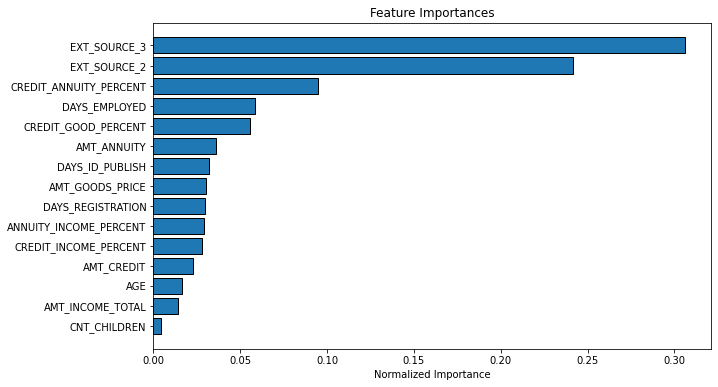

,index,feature,importance
0,9,EXT_SOURCE_3,0.306049
1,8,EXT_SOURCE_2,0.241861
2,13,CREDIT_ANNUITY_PERCENT,0.094772
3,5,DAYS_EMPLOYED,0.058725
4,14,CREDIT_GOOD_PERCENT,0.055535
5,3,AMT_ANNUITY,0.035921
6,7,DAYS_ID_PUBLISH,0.031972
7,4,AMT_GOODS_PRICE,0.030385
8,6,DAYS_REGISTRATION,0.029807
9,12,ANNUITY_INCOME_PERCENT,0.029030


In [31]:
plot_feature_importances(feature_importances)

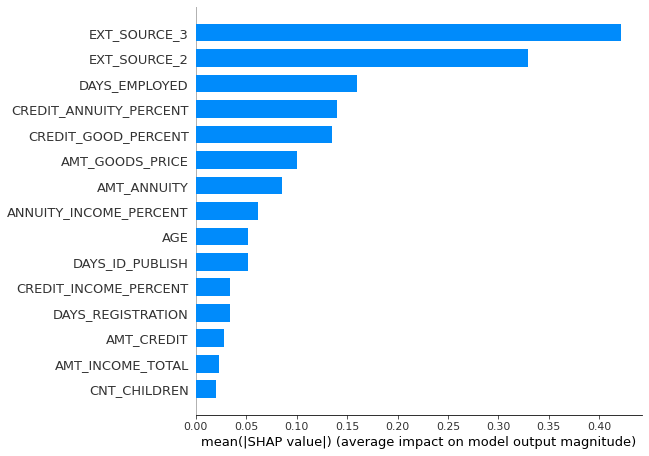

In [32]:
import shap
shap_values = shap.TreeExplainer(GB).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [33]:
''' Plotting by correlation'''

def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # We Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    
    #  We create a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend = False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")

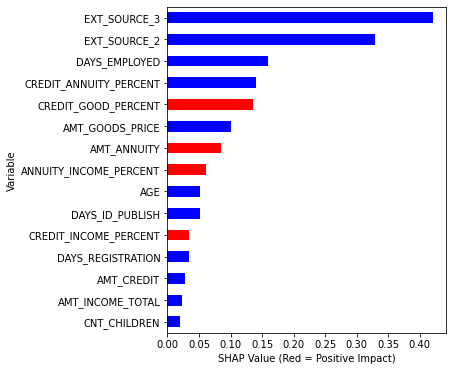

In [34]:
ABS_SHAP(shap_values,X_train) 

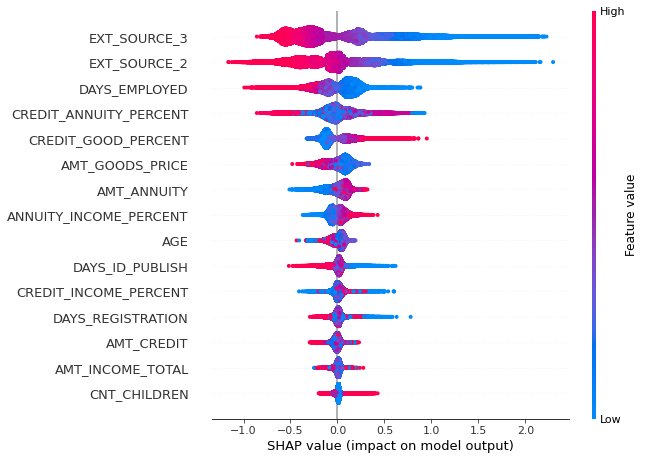

In [35]:
shap.summary_plot(shap_values, X_train)

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

# Predictions on our training set
y_train_pred = cross_val_predict(GB, X_train, y_train, cv = 5)

In [37]:
# Confusion matrix
confusion_matrix(y_train, y_train_pred)

array([[166043,    323],
       [ 14818,    363]], dtype=int64)

## ROC curve

Roc curve plots false positives' rate compared at True positives' rate for each possible threshold

In [38]:
# Applying decision function method
y_scores = cross_val_predict(GB, X_train, y_train, cv = 5, method = 'decision_function')

In [39]:
from sklearn.metrics import roc_curve

# ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

In [40]:
def plot_roc_curve(fpr, tpr, label = None):
    
    
    # Defining figure and axes
    plt.figure(figsize=(10,6))
    ax=plt.subplot()
    
    # Plotting roc_curve
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    # Potting dotted diagonal
    plt.plot([0, 1], [0, 1], 'k--')

No handles with labels found to put in legend.


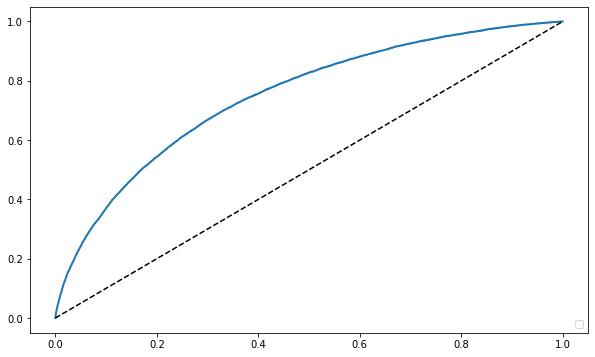

In [41]:
plot_roc_curve(fpr, tpr)
plt.legend(loc = 'lower right')

In [42]:
from sklearn.metrics import precision_recall_curve

# Getting precisions, recalls and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

In [43]:
def plot_precision_recall_vs_threshold (precisions, recalls, thresholds):
    
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precision')
    plt.plot(thresholds, recalls[:-1], 'b--', label = 'Recall')
    

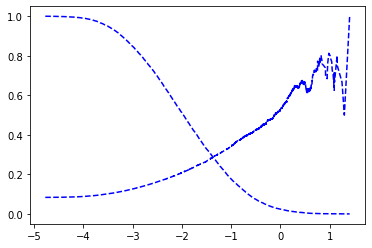

In [44]:
plot_precision_recall_vs_threshold (precisions, recalls, thresholds)